In [2]:
# It is important to run the following notes sequentially 
# because later notes may have dependencies on earlier declarations.
import matplotlib
import sys
import argparse
import numpy as np
import pandas as pd
import os, re
    
train_input='task_features.tsv'
df_data = pd.read_csv(train_input,sep='\t')

In [3]:
# Q6 answer: 163
#dataframe regards to SearchTerm 'apple iphone'
apple_iphone=df_data[df_data['SearchTerm'] == 'apple iphone'][['PageId',"Timestamp", "ClickIndex"]]
g = apple_iphone.groupby(['Timestamp']).sum()
g.size

163

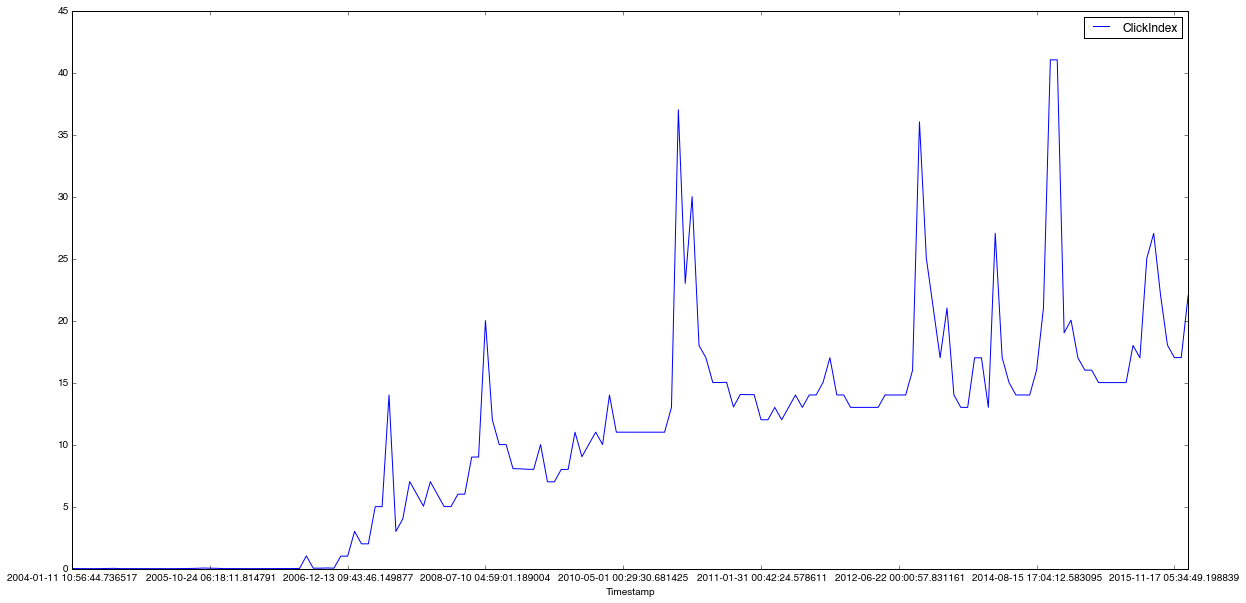

In [84]:
# Q6 time series plotting
# plot the total clickIndex per PageId on keyword 'apple iphone'
%matplotlib inline
g.plot(figsize=(20,10))

In [19]:
# Q7: LR click index forcasting ClickIndex of 1 Oct 2016
# answer: 25.37
from sklearn.linear_model import LinearRegression
t_df = g.reset_index()
#print(t_df[:200])
tstamp = pd.to_datetime(t_df['Timestamp'])

# transform timestamp into features
X = pd.concat([tstamp.dt.day, tstamp.dt.month, tstamp.dt.year], axis=1)
X.columns = ['day', 'month','year']
y = t_df['ClickIndex']

model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=2)
model.fit(X,y)
test=pd.Series([1,10,2016], index=['day', 'month', 'year'])
model.predict(test)


array([ 25.36897063])

(array([ 22.51970994]), array([ 4.06468161]), array([[ 14.55308037,  30.4863395 ]]))


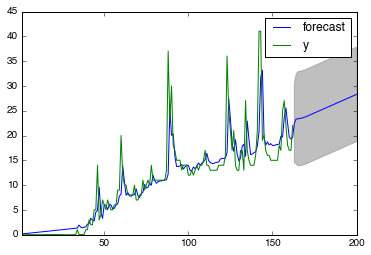

In [122]:
# Q7: attempts to forecast using ARIMA but not quite sure how to 
# specify a forcast day?
%matplotlib inline
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

t_df = g.reset_index()
t_df.index = pd.to_datetime(t_df.pop('Timestamp'))
data = t_df.reset_index()
X=data['Timestamp']
y=data["ClickIndex"]

ts = pd.TimeSeries(y.values, index=X.values)
df = pd.DataFrame(ts)
#print(ts)
model = ARIMA(ts, (4,1,1))
result = model.fit()

result.plot_predict(start=1, end=200)
#start_date = pd.to_datetime(pd.Series('2016-10-01'))
#end_date = pd.to_datetime(pd.Series('2016-10-31'))
print(result.forecast(1))


In [74]:
# Q9 
q = 'apple recipes'
organic = df_data[(df_data['Position'] == 'organicRes') & (df_data['SearchTerm'] == q)]
g = organic.groupby(['Domain']).size().order(ascending=False)
print ("organic domains for search term:",q)
print(g)

organic domains for search term: apple recipes
Domain
foodnetwork.com          75
bbcgoodfood.com          70
countryliving.com        59
simplyrecipes.com        56
allrecipes.com.au        43
taste.com.au             43
marthastewart.com        43
allrecipes.co.uk         37
aussieapples.com.au      33
goodtoknow.co.uk         32
theguardian.com          32
greatbritishchefs.com    32
bramleyapples.co.uk      32
bbc.co.uk                32
telegraph.co.uk          29
custardapple.com.au      27
thekitchn.com            22
tasteofhome.com           9
dtype: int64


In [75]:
# Q9 
q = 'apple iphone'
organic = df_data[(df_data['Position'] == 'organicRes') & (df_data['SearchTerm'] == q)]
g = organic.groupby(['Domain']).size().order(ascending=False)
print ("organic domains for search term:",q)
print(g)


organic domains for search term: apple iphone
Domain
apple.com               425
ndtv.com                142
snapdeal.com             53
wikipedia.org            51
jbhifi.com.au            50
gsmarena.com             46
dicksmith.com.au         44
officeworks.com.au       43
giffgaff.com             41
vodafone.co.nz           36
kogan.com                30
o2.co.uk                 29
noelleeming.co.nz        21
moneysupermarket.com     12
mobiles.co.uk             3
vodafone.com.au           2
telstra.com.au            2
pricespy.co.nz            1
express.co.uk             1
smh.com.au                1
dtype: int64


In [76]:
# Q9 
q = 'apple shares'
organic = df_data[(df_data['Position'] == 'organicRes') & (df_data['SearchTerm'] == q)]
g = organic.groupby(['Domain']).size().order(ascending=False)
#name = g.index.get_level_values('Domain')[0]
print ("organic domains for search term:",q)
print(g)


organic domains for search term: apple shares
Domain
yahoo.com          220
marketwatch.com    111
cnbc.com           105
google.com         100
hl.co.uk            94
nasdaq.com          85
apple.com           48
news.com.au         37
google.co.uk        33
wsj.com             19
thestreet.com       17
google.ca           15
fool.com             9
usatoday.com         8
reuters.com          7
ft.com               7
bloomberg.com        5
fortune.com          5
macrumors.com        3
cnn.com              2
ycharts.com          1
forbes.com           1
latimes.com          1
smh.com.au           1
twitter.com          1
ibtimes.com          1
dtype: int64


In [102]:
# Q12 top 10 domains that appear on most search pages
df_data.groupby(['Domain'])['PageId'].count().order(ascending=False)[:10]

Domain
apple.com          10716
marketwatch.com     4567
yahoo.com           3454
ig.com              3063
taste.com.au        3025
ndtv.com            2729
gsmarena.com        2628
hl.co.uk            2507
ask.com             2351
nasdaq.com          2215
Name: PageId, dtype: int64

In [104]:
# Q13.1
q = 'apple'
organic = df_data[(df_data['Position'] == 'organicRes') & (df_data['SearchTerm'] == q)]
g = organic.groupby(['Domain']).size().order(ascending=False)
#name = g.index.get_level_values('Domain')[0]
print ("organic domains for search term:",q)
print(g[:2])

organic domains for search term: apple
Domain
wikipedia.org    152
apple.com        108
dtype: int64


In [124]:
# Q13.2
domain_list = df_data['Domain'].unique()
num=0
for idx1 in range(len(domain_list)):
    if num==10:
        break
    for idx2 in range(idx1+1,len(domain_list)):
        domain1 = domain_list[idx1]
        domain2 = domain_list[idx2]
        search_terms_d1 = set(df_data[df_data['Domain']==domain1]['SearchTerm'].unique())
        search_terms_d2 = set(df_data[df_data['Domain']==domain2]['SearchTerm'].unique())
        intersec = search_terms_d1 & search_terms_d2;
        #if two domains have no intersection search terms (very dissimilar)
        if(len(intersec) ==0):
            print(domain1, domain2)
            num+=1
            break



ir.net wikipedia.org
adnews.com.au apple.com
cnn.com engadget.com
mashable.com wikipedia.org
businessinsider.com.au time.com
recode.net apple.com
smh.com.au time.com
fortune.com pcworld.com
news.com.au techtarget.com
apple.com alpro.com


In [8]:
# Q14 linear regression model to predict ClickIndex
# categorical features are expended using dummy variables.
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
import numpy as np
import pandas as pd
train_input='task_features.tsv'
df_data = pd.read_csv(train_input,sep='\t')
tstamp = pd.to_datetime(df_data['Timestamp'])
df_data2 = df_data.drop(['Timestamp','PageId'], 1)

# transform timestamp into features
date_features = pd.concat([tstamp.dt.dayofweek, tstamp.dt.day/tstamp.dt.daysinmonth, 
                           tstamp.dt.month, tstamp.dt.year], axis=1)
date_features.columns = ['dayofweek', 'daysinmonth', 'month','year']

# Group features by types
col_by_types = df_data2.columns.to_series().groupby(df_data2.dtypes).groups
cat_cols = col_by_types[np.dtype('O')]
int_cols = col_by_types[np.dtype('int64')]
float_cols = col_by_types[np.dtype('float64')]
# Get dummies for categorical features
#print('Get dummies for categorical features')
dummies = pd.get_dummies(df_data2[cat_cols], dummy_na=True)
#dummies.shape
all_features = pd.concat([date_features,
df_data2[int_cols],dummies,df_data2[float_cols]],join='inner',axis=1)

#ramdom shuffling
df_data2 = all_features.reindex(np.random.permutation(all_features.index))
#test/train split
#n = df_data2.shape[0]
#n_train = int(n*0.8)

#X_train = df_data2[:n_train].ix[:,:-1]
#y_train = df_data2[:n_train]['ClickIndex']
#X_test = df_data2[n_train:].ix[:,:-1]
#y_test = df_data2[n_train:]['ClickIndex']
X = df_data2.ix[:,:-1]
target = df_data2['ClickIndex']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
     X, target, test_size=0.2, random_state=5623)
#print(y_test.shape)
#data_train
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=2)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=False)

In [9]:
# Q15 linear regression model to predict ClickIndex
# evaluate using score (sum of error)
# The coefficients
#print('Coefficients: \n', model.coef_)
scores = cross_validation.cross_val_score(model, X, target, cv=5)
print(scores)

p = model.predict(X_test)
# Returns the coefficient of determination R^2 of the prediction.
# The coefficient R^2 is defined as (1 - u/v), where u is the regression sum of squares 
# ((y_true - y_pred) ** 2).sum() and v is the residual sum of squares 
# ((y_true - y_true.mean()) ** 2).sum(). Best possible score is 1.0 and it can be negative 
# (because the model can be arbitrarily worse). A constant model that always predicts 
# the expected value of y, disregarding the input features, would get a R^2 score of 0.0.
print('score: %.2f' % model.score(X_test, y_test))

[ -5.70841677e+12   4.13680300e-01   4.43184858e-01   3.97227279e-01
  -7.82292024e+12]
score: 0.41


In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
pca.explained_variance_

array([ 18.58619646,  12.34353714])

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, target)
print(model.feature_importances_)